# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
# (a) Load data (features) and normalize the data
def load_data():
    data=np.load('features.npy')
    data_normalized=(data-np.mean(data,axis=0))/np.std(data,axis=0)
    return data_normalized
P=load_data()

In [63]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values

def eigendecomp(X):
    n=len(X)
    C = np.cov(X.T)
    print(C.shape)
    # Eigen decomposition
    eigenValues, eigenVectors = np.linalg.eig(C)
    idx = eigenValues.argsort()[::-1]   
    sorted_eig_vals = eigenValues[idx]
    sorted_eig_vecs = eigenVectors[:,idx]
    return (sorted_eig_vals, sorted_eig_vecs)
sorted_eig_vals, sorted_eig_vecs=eigendecomp(P)
print("Sorted Eigen Values are :"+str(sorted_eig_vals))
print("Sorted Eigen Vectors are :"+str(sorted_eig_vecs))

(8, 8)
Sorted Eigen Values are :[ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  8.98851439e-16 -1.31385926e-16 -6.12506839e-16]
Sorted Eigen Vectors are :[[-0.39124937  0.13884872 -0.46160937  0.58034539  0.24934936  0.09502813
   0.41458399  0.15875925]
 [ 0.11687696 -0.4391715  -0.78711289 -0.2905579  -0.12725786  0.15733318
  -0.20945618  0.09463144]
 [-0.40655289  0.29080021 -0.13961871 -0.12636707 -0.54994554  0.17331863
   0.09114106 -0.61127232]
 [-0.39944906  0.26454833 -0.16206048 -0.54404218  0.49904279 -0.43946377
  -0.05284949 -0.0484821 ]
 [-0.3778555  -0.35426671  0.07790627  0.42060984  0.12822569 -0.14932029
  -0.65144711 -0.24946272]
 [-0.09816172 -0.64299795  0.11941452 -0.04972667 -0.0795516  -0.43247222
   0.57574617 -0.26011976]
 [-0.45509399 -0.03231459  0.12200908 -0.08034689 -0.51935676 -0.19102316
  -0.10045113  0.67371391]
 [-0.38587285 -0.30545597  0.29393481 -0.28457653  0.27864817  0.70514506
   0.08480007  0.07779233]]


In [64]:
# (c) Evaluate using variance_explained as the metric
def eval():
    TE=np.sum(sorted_eig_vals)
    d={}
    print("Variance")
    for j in range(len(sorted_eig_vals)):
        Q=0
        for k in range(j+1):
            Q+= (sorted_eig_vals[k])
        d["k{0} = ".format(j)]=Q/TE
    print(d)
    print("Eigenvalues")
    for i in range(len(sorted_eig_vals)):
        print("k= ", i+1," = ",(sorted_eig_vals[i]))
    return d
print("Variance gives the measure of contribution of each feature. When K is 3 it captures around 97% data. I would select k=3 as computational cost is reduced by lesser features")

Variance gives the measure of contribution of each feature. When K is 3 it captures around 97% data. I would select k=3 as computational cost is reduced by lesser features


In [65]:
# (d) Visualize after projecting to 2-D space
def viz():
    eig_vect=sorted_eig_vecs[:,0:2]
    datanew=P@eig_vect
    datanew=datanew[:,:3]
    ynew=datanew.T
    l=np.load('labels.npy', allow_pickle=True)
    ynewplot1=ynew.T[:,0]
    ynewplot2=ynew.T[:,1]
    plt.title("Data in 2-D Space")
    unique = list(set(l))
    colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
    for i, u in enumerate(unique):
        xi = [ynewplot1[j] for j  in range(len(ynewplot1)) if l[j] == u]
        yi = [ynewplot2[j] for j  in range(len(ynewplot2)) if l[j] == u]
        plt.scatter(xi, yi, c=colors[i], label=str(u))
    plt.legend()

    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Variance
{'k0 = ': 0.5889212098295767, 'k1 = ': 0.8739896347022307, 'k2 = ': 0.9704560233211401, 'k3 = ': 0.9958074918820436, 'k4 = ': 0.9999999999999998, 'k5 = ': 1.0, 'k6 = ': 1.0, 'k7 = ': 1.0}
Eigenvalues
k=  1  =  4.74298960936572
k=  2  =  2.2958530862227167
k=  3  =  0.7769105123670564
k=  4  =  0.20417290116163855
k=  5  =  0.03376516605065379
k=  6  =  8.988514394516542e-16
k=  7  =  -1.3138592633207446e-16
k=  8  =  -6.125068394845793e-16


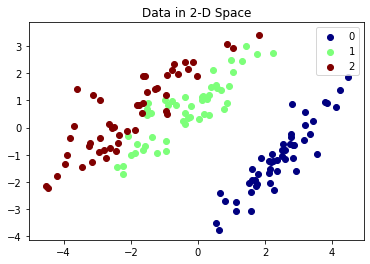

In [66]:
def main():

    eval()
    viz()

if __name__ == "__main__":
    main()

Answer e1- If there are 1000 features and 10 data points the dimension of covariance matrix will be (1000,1000). The Performance can be improved by reducing the number of features by PCA, using only those features which can explain the data well. The performance can also be improved by collecting more data points.

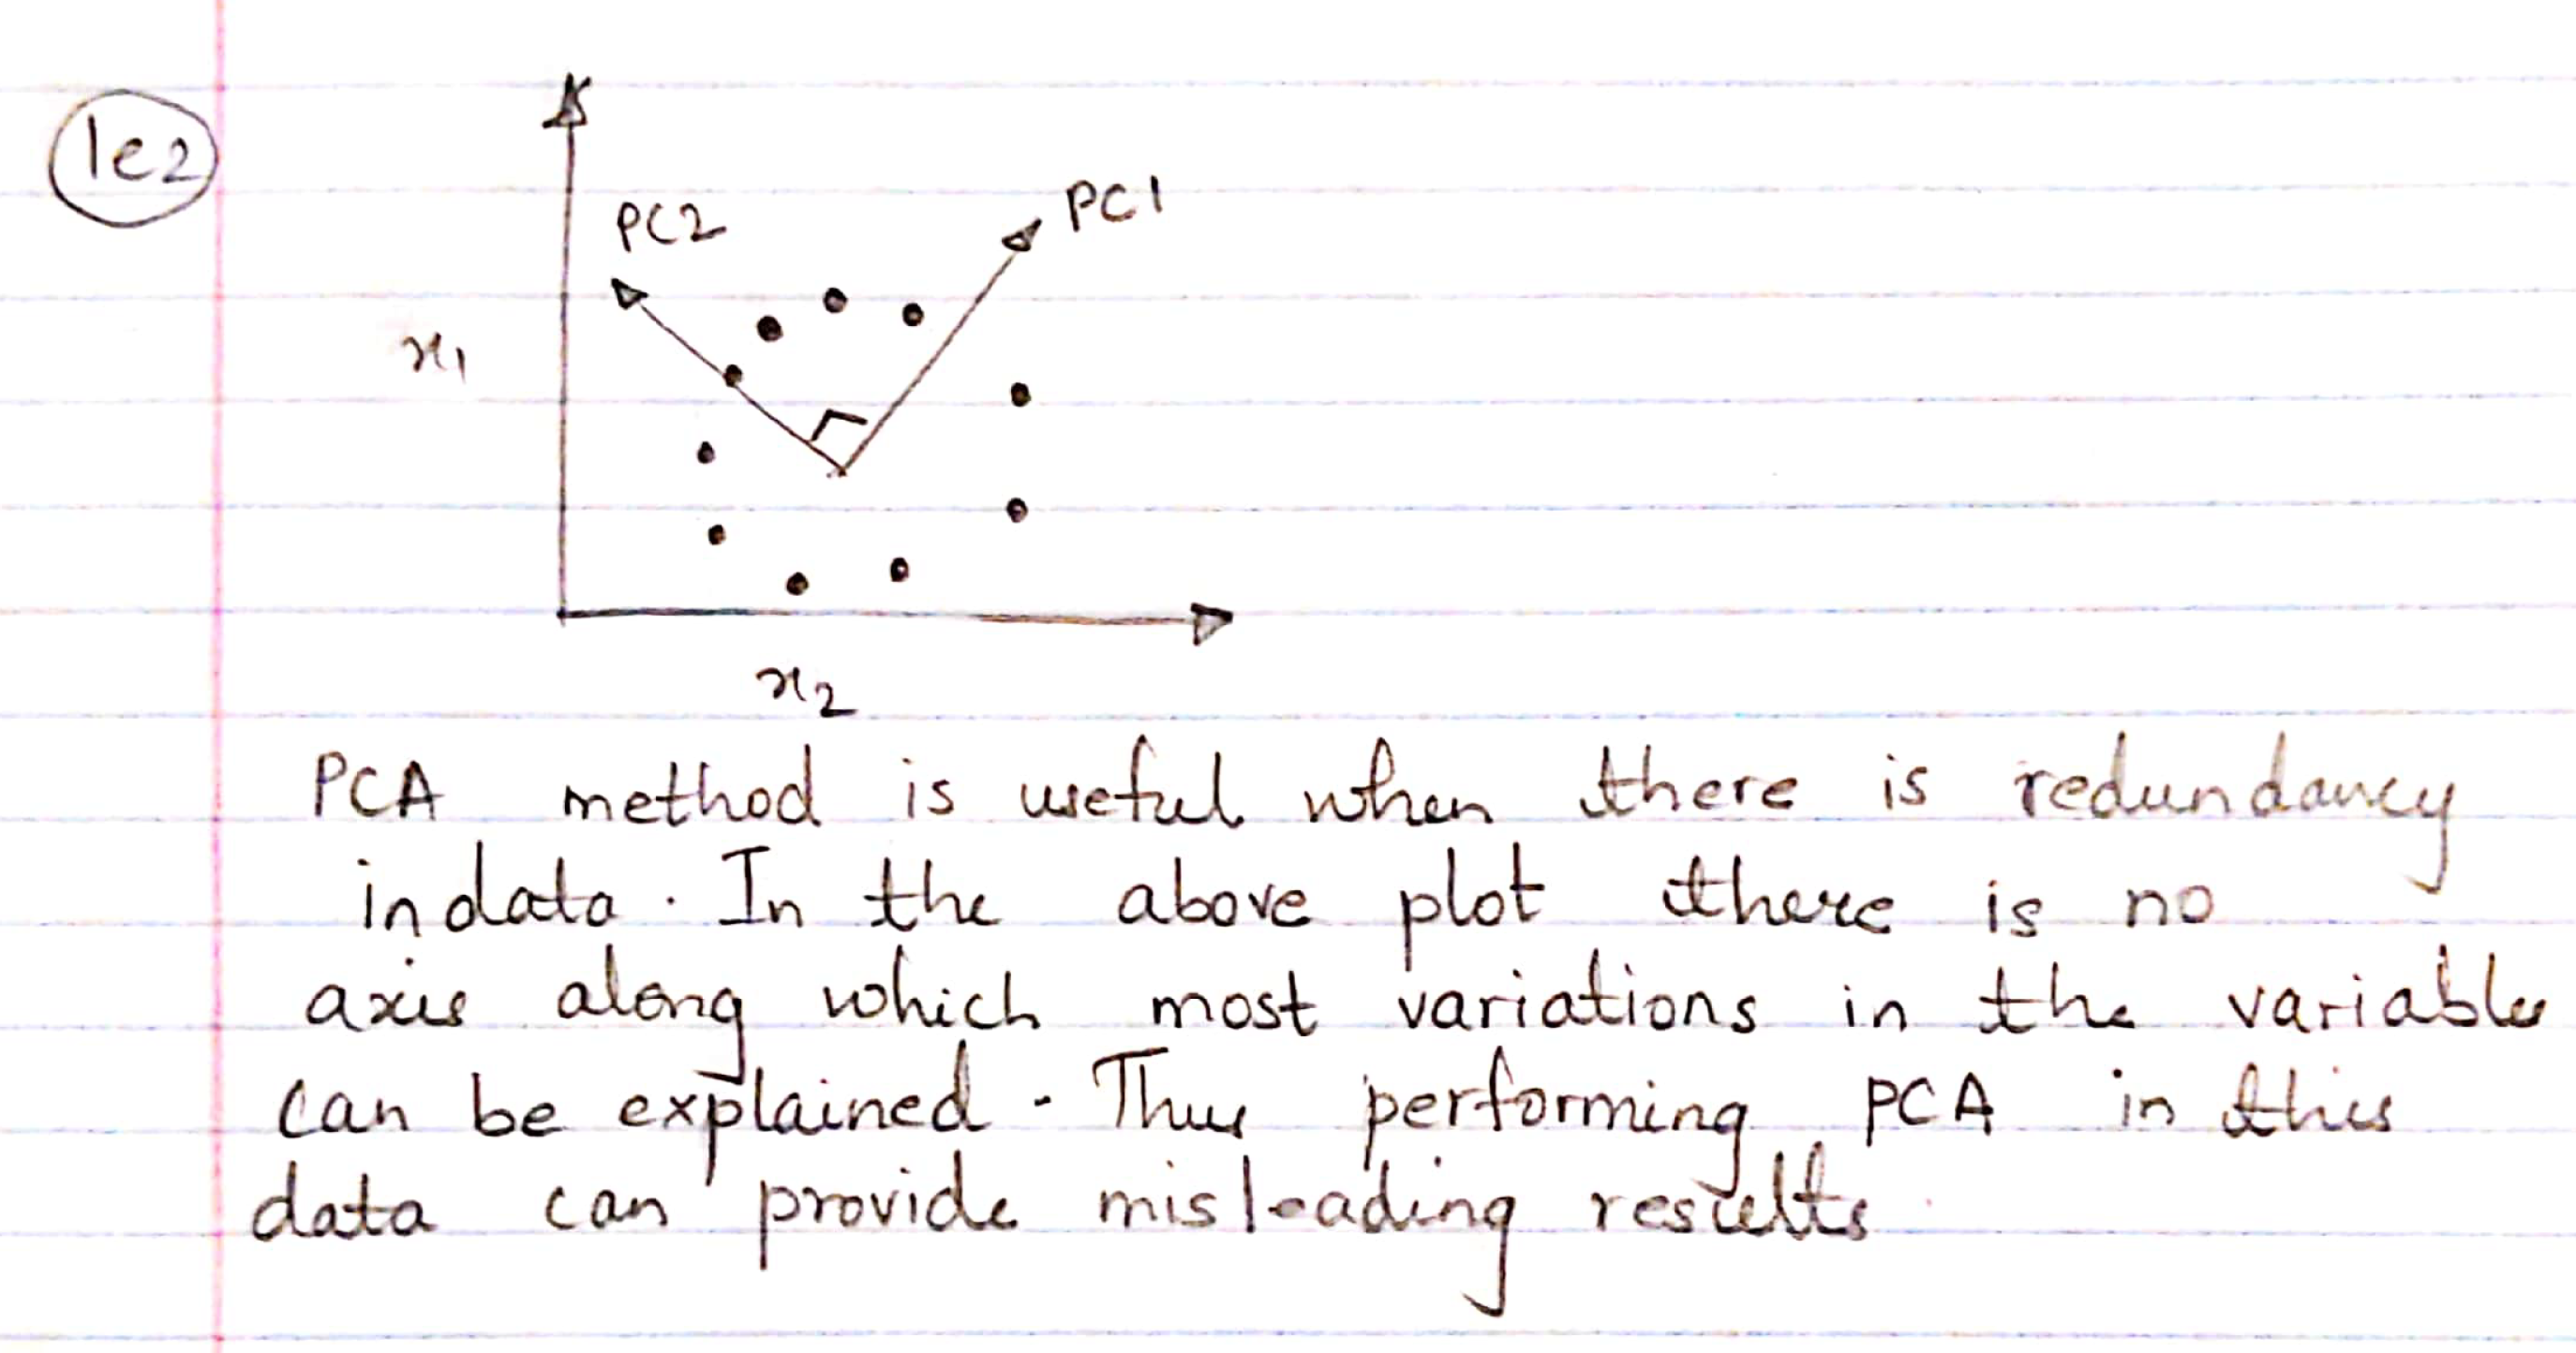